<a href="https://colab.research.google.com/github/Henrry97escolastico/COVID-19-CONEXIONES-AEREAS-MEXICANAS/blob/master/MounstroTrackJoseManuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.



In [ ]:
!pip install mplleaflet
import mplleaflet

In [ ]:
def vecinos(df,r,i):
  return df[df[i] < r][i]

In [ ]:
aeros=pd.read_csv("latitud y longitud.csv")
aeros

,Latitud,Longitud
0,20.698605,-103.453468
1,21.476550,-104.869632
2,22.775445,-102.622915
3,25.807460,-100.274500
4,25.551032,-103.396900
5,22.141718,-100.944330
6,28.630767,-106.023030
7,24.061732,-104.609070
8,17.090028,-96.570670
9,16.576070,-95.163080


In [ ]:
import plotly.express as px
fig = px.scatter_mapbhju7  box(aeros, lat=aeros['Latitud'], lon=aeros['Longitud'],width=1400,height=800,zoom=5)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title = 'Grafo chido')
fig.update_traces(opacity=0.5, marker=dict(  color='purple', size=14))

In [ ]:
xy=(aeros.values)
xy

array([[  20.698605  , -103.4534683 ],
       [  21.47655   , -104.8696317 ],
       [  22.775445  , -102.622915  ],
       [  25.80746   , -100.2745    ],
       [  25.55103167, -103.3969    ],
       [  22.14171833, -100.94433   ],
       [  28.63076667, -106.02303   ],
       [  24.06173167, -104.60907   ],
       [  17.09002833,  -96.57067   ],
       [  16.57607   ,  -95.16308   ],
       [  17.79950833,  -97.78349   ],
       [  18.519275  ,  -88.30464   ],
       [  20.92881333,  -89.68389   ],
       [  19.79050167,  -90.61031   ],
       [  24.78840167, -107.4351    ],
       [  24.13355167, -110.3226    ],
       [  29.03419167, -110.96015   ],
       [  17.53006   ,  -99.491638  ],
       [  18.93182333,  -98.88650333],
       [  19.09529   ,  -98.21084833],
       [  19.32314   ,  -98.21085   ],
       [  14.89668   ,  -92.271535  ],
       [  16.7334    ,  -92.90364833],
       [  18.00103   ,  -94.92182833],
       [  18.81142   ,  -97.188881  ],
       [  20.53535   ,  -

In [ ]:
N=len(xy)

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
distancias = cdist(xy, xy, 'euclidean')
distancias

array([[ 0.        ,  1.61577139,  2.23675729,  6.01716203,  4.85275639,
         2.89453815,  8.33797554,  3.55612658,  7.77140515,  9.2588246 ,
         6.36815636, 15.30478612, 13.77150255, 12.87522298,  5.70787419,
         7.68009303, 11.21749862,  5.07304413,  4.8968037 ,  5.48230637,
         5.42005079, 12.59753809, 11.27038385,  8.94794901,  6.54266928,
         5.96916121],
       [ 1.61577139,  0.        ,  2.59516168,  6.31442925,  4.33247499,
         3.9812614 ,  7.24659532,  2.59827956,  9.38692376, 10.87344702,
         7.98336017, 16.82689589, 15.19561669, 14.35865642,  4.18927071,
         6.06584876,  9.70630521,  6.67065211,  6.50180428,  7.0717604 ,
         6.99832468, 14.21290715, 12.87176095, 10.53745848,  8.12999688,
         7.44284223],
       [ 2.23675729,  2.59516168,  0.        ,  3.83512294,  2.88148124,
         1.79422883,  6.77093597,  2.36629353,  8.30383238,  9.6995561 ,
         6.94118002, 14.93746906, 13.07013452, 12.37790635,  5.2162361 ,
       

In [ ]:
distancias_df=pd.DataFrame(distancias)
distancias_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.000000,1.615771,2.236757,6.017162,4.852756,2.894538,8.337976,3.556127,7.771405,9.258825,6.368156,15.304786,13.771503,12.875223,5.707874,7.680093,11.217499,5.073044,4.896804,5.482306,5.420051,12.597538,11.270384,8.947949,6.542669,5.969161
1,1.615771,0.000000,2.595162,6.314429,4.332475,3.981261,7.246595,2.598280,9.386924,10.873447,7.983360,16.826896,15.195617,14.358656,4.189271,6.065849,9.706305,6.670652,6.501804,7.071760,6.998325,14.212907,12.871761,10.537458,8.129997,7.442842
2,2.236757,2.595162,0.000000,3.835123,2.881481,1.794229,6.770936,2.366294,8.303832,9.699556,6.941180,14.937469,13.070135,12.377906,5.216236,7.818542,10.425037,6.108925,5.360429,5.745422,5.602207,13.008690,11.444232,9.061003,6.726234,5.603604
3,6.017162,6.314429,3.835123,0.000000,3.132912,3.726437,6.404425,4.672907,9.471640,10.552022,8.386443,14.014107,11.660284,11.384215,7.232750,10.186574,11.162209,8.314338,7.014336,7.022242,6.804782,13.531170,11.690510,9.465276,7.646281,5.963880
4,4.852756,4.332475,2.881481,3.132912,0.000000,4.199823,4.047385,1.920253,10.871338,12.179726,9.570605,16.649982,14.471059,14.024286,4.109582,7.069269,8.326773,8.921158,8.009844,8.280805,8.104428,15.404186,13.706165,11.350302,9.163071,7.751736
5,2.894538,3.981261,1.794229,3.726437,4.199823,0.000000,8.240203,4.137242,6.681951,8.024917,5.370819,13.148531,11.325575,10.598122,7.009638,9.587458,12.158242,4.835050,3.812883,4.093000,3.926359,11.300794,9.690329,7.308613,5.019391,3.812707
6,8.337976,7.246595,6.770936,6.404425,4.047385,8.240203,0.000000,4.782820,14.917632,16.225111,13.609048,20.400579,18.063432,17.768011,4.093618,6.221836,4.953575,12.879626,12.041574,12.327023,12.151628,19.435245,17.710604,15.369710,13.208397,11.764669
7,3.556127,2.598280,2.366294,4.672907,1.920253,4.137242,4.782820,0.000000,10.640513,12.052463,9.263044,17.220722,15.250448,14.635870,2.917961,5.713981,8.066076,8.297641,7.685293,8.099555,7.961876,15.369221,13.810190,11.426931,9.089828,7.947692
8,7.771405,9.386924,8.303832,9.471640,10.871338,6.681951,14.917632,10.640513,0.000000,1.498487,1.405096,8.388683,7.884416,6.543581,13.315434,15.450786,18.700807,2.953927,2.958934,2.590610,2.770736,4.826317,3.684322,1.883774,1.829036,3.564977
9,9.258825,10.873447,9.699556,10.552022,12.179726,8.024917,16.225111,12.052463,1.498487,0.000000,2.891946,7.128411,6.997707,5.573176,14.766342,16.938907,20.118455,4.432439,4.406070,3.954157,4.103084,3.343858,2.264903,1.445238,3.016730,4.590682


In [ ]:
pares=[]
radio=5
for i in np.arange(N):
  vec_serie=vecinos(distancias_df,radio,i)
  lista=(list(vec_serie.index.values)) 
  for p in lista:
    if (p != i):
      pares.append([i,p])
      print(i,p)

0 1
0 2
0 4
0 5
0 7
0 18
1 0
1 2
1 4
1 5
1 7
1 14
2 0
2 1
2 3
2 4
2 5
2 7
3 2
3 4
3 5
3 7
4 0
4 1
4 2
4 3
4 5
4 6
4 7
4 14
5 0
5 1
5 2
5 3
5 4
5 7
5 17
5 18
5 19
5 20
5 25
6 4
6 7
6 14
6 16
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 14
8 9
8 10
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
9 8
9 10
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
10 8
10 9
10 17
10 18
10 19
10 20
10 22
10 23
10 24
10 25
11 12
11 13
11 22
12 11
12 13
13 11
13 12
13 22
13 23
14 1
14 4
14 6
14 7
14 15
15 14
15 16
16 6
16 15
17 5
17 8
17 9
17 10
17 18
17 19
17 20
17 23
17 24
17 25
18 0
18 5
18 8
18 9
18 10
18 17
18 19
18 20
18 23
18 24
18 25
19 5
19 8
19 9
19 10
19 17
19 18
19 20
19 23
19 24
19 25
20 5
20 8
20 9
20 10
20 17
20 18
20 19
20 23
20 24
20 25
21 8
21 9
21 22
21 23
22 8
22 9
22 10
22 11
22 13
22 21
22 23
22 24
23 8
23 9
23 10
23 13
23 17
23 18
23 19
23 20
23 21
23 22
23 24
23 25
24 8
24 9
24 10
24 17
24 18
24 19
24 20
24 22
24 23
24 25
25 5
25 8
25 9
25 10
25 17
25 18
25 19
25 20
25 23
25 24


In [ ]:
G = nx.Graph()

In [ ]:
for par in parest:
  G.add_edge(str(par[0]),str(par[1]))

In [ ]:
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

We have 26 nodes.
We have 70 edges.


In [ ]:
latitud=aeros['Latitud'].values
longitud=aeros['Longitud'].values

In [ ]:
diccio={} 
seed=108
for i in np.arange(N):
  np.random.seed(i+seed)
  diccio[str(i)]=np.array([longitud[i],latitud[i]])
print(diccio)

{'0': array([-103.4534683,   20.698605 ]), '1': array([-104.8696317,   21.47655  ]), '2': array([-102.622915,   22.775445]), '3': array([-100.2745 ,   25.80746]), '4': array([-103.3969    ,   25.55103167]), '5': array([-100.94433   ,   22.14171833]), '6': array([-106.02303   ,   28.63076667]), '7': array([-104.60907   ,   24.06173167]), '8': array([-96.57067   ,  17.09002833]), '9': array([-95.16308,  16.57607]), '10': array([-97.78349   ,  17.79950833]), '11': array([-88.30464 ,  18.519275]), '12': array([-89.68389   ,  20.92881333]), '13': array([-90.61031   ,  19.79050167]), '14': array([-107.4351    ,   24.78840167]), '15': array([-110.3226    ,   24.13355167]), '16': array([-110.96015   ,   29.03419167]), '17': array([-99.491638,  17.53006 ]), '18': array([-98.88650333,  18.93182333]), '19': array([-98.21084833,  19.09529   ]), '20': array([-98.21085,  19.32314]), '21': array([-92.271535,  14.89668 ]), '22': array([-92.90364833,  16.7334    ]), '23': array([-94.92182833,  18.00103

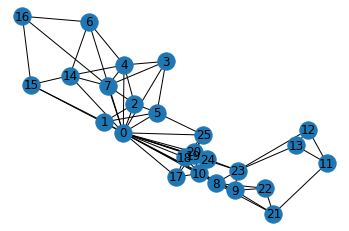

In [ ]:
pos=diccio
fig, ax = plt.subplots()
nx.draw(G,pos=pos,with_labels=True)
plt.show()

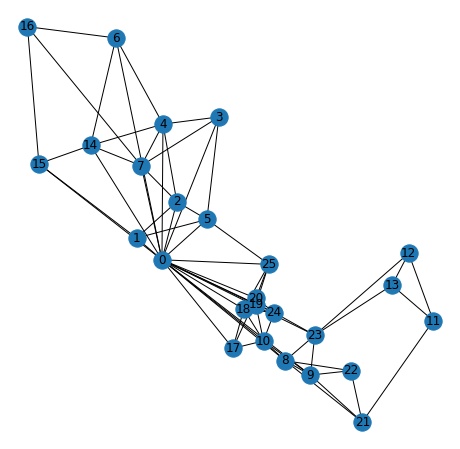

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
pos=diccio

nx.draw(G,pos=pos,with_labels=True)

plt.show()
mplleaflet.display(fig=fig)